In [3]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/MyGoogleDrive')

Mounted at /content/MyGoogleDrive


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


預測結果為： [1]


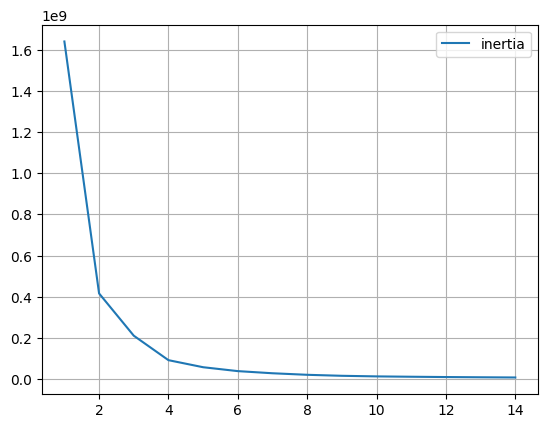

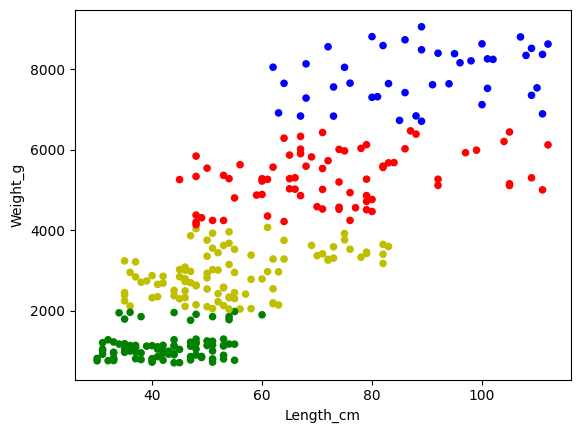

In [4]:
import pandas as pd
from sklearn.cluster import KMeans

def read_and_clean_data(file_path):
  # 讀取企鵝資料集，刪除ID欄位和重複資料
  df = pd.read_csv(file_path).drop('ID', axis=1).drop_duplicates()

  # 刪除缺失值，重新編號，將Species的字串換成數值
  species_dict = {'Chinstrap penguin': 0, 'Little penguin': 1, 'Galapagos penguin': 2, 'Gentoo penguin': 3}
  df = df.dropna().reset_index(drop=True)
  df['Species'] = df['Species'].map(species_dict)

  return df

def find_optimal_k(df_X):
  # 使用迴圈尋找最佳K值
  s = []
  for k in range(1, 15):
      km = KMeans(n_clusters=k, n_init=10).fit(df_X)
      s.append(km.inertia_)

  df_kmeans = pd.DataFrame({'inertia': s}, index=range(1, 15))
  df_kmeans.plot(grid=True)

def perform_kmeans(df_X, k):
  # 使用K-means演算法進行分群，並在散佈圖中繪製不同顏色的點表示不同的群別
  km = KMeans(n_clusters=4, n_init=10).fit(df_X)
  pred = km.fit_predict(df_X)

  df1 = df_X.copy()
  df1['pred'] = pred
  c = {0: 'r', 1: 'g', 2: 'b', 3:'y'}
  df1['colors'] = df1['pred'].map(c)

  df1.plot(kind='scatter', x='Length_cm', y='Weight_g', c=df1['colors'])

def predict_new_penguin(new_data, km):
  # 使用已訓練的K-means模型，預測新加入的企鵝屬於哪一個群別
  v = km.predict(new_data)
  print('預測結果為：', v)

# 讀取並整理企鵝資料集
df = read_and_clean_data('/content/MyGoogleDrive/MyDrive/Colab Notebooks/penguin.csv')

# 尋找最佳K值
find_optimal_k(df[['Length_cm', 'Weight_g']])

# 使用K-means演算法進行分群
perform_kmeans(df[['Length_cm', 'Weight_g']], k=3)

# 預測新加入的企鵝屬於哪一個群別
new_data = [[52, 1234]]
km = KMeans(n_clusters=4)
km.fit(df[['Length_cm', 'Weight_g']])
predict_new_penguin(new_data, km)